In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fct_velocity(x, latency, tau, steady_state) :

    time = x
    velocity = []
    maxi = steady_state
    for t in range(len(time)) :

        if time[t] < latency :
            velocity.append(0)
        else :
            velocity.append(maxi*(1-np.exp(-1/tau*(time[t]-latency))))

    return velocity


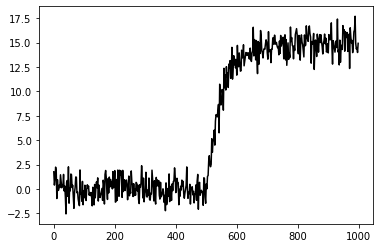

In [3]:
x = np.asarray(range(0, 1000, 2))
latency = 500
tau = 50
steady_state = 15
np.random.seed(0)

velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)

plt.plot(x, velo, 'k');

In [4]:
param_fit = [{'name':'steady_state', 'value':12,  'min':5.,  'max':40.},
             {'name':'latency',      'value':500, 'min':100, 'max':700},
             {'name':'tau',          'value':15., 'min':13., 'max':80.}]

inde_vars = {'x': x}

from lmfit import  Model, Parameters

equation = fct_velocity

params = Parameters()
model = Model(equation, independent_vars=inde_vars.keys())

for num_par in range(len(param_fit)) :
    params.add(param_fit[num_par]['name'],
               value = param_fit[num_par]['value'],
               min   = param_fit[num_par]['min'],
               max   = param_fit[num_par]['max'])

result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)


In [5]:
result_deg

In [6]:
result_deg.values['latency']

501.5071921687859

# NaN

In [7]:
N_test = 200

std_lat = []
for y1 in range(0, 500, 20) :
    
    y2 = y1+40
    
    velo = fct_velocity(x, latency, tau, steady_state)
    velo += 1*np.random.randn(x.size)
    
    velo[y1:y2] = np.nan
    
    Lats = []
    for i_test in range(N_test):
        

        for num_par in range(len(param_fit)) :
            if param_fit[num_par]['name'] == 'latency' :
                val = param_fit[num_par]['value']+100*np.random.rand()
            else :
                val = param_fit[num_par]['value']
            params.add(param_fit[num_par]['name'],
                       value =  val,
                       min   = param_fit[num_par]['min'],
                       max   = param_fit[num_par]['max'])

        result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)
        Lats.append(result_deg.values['latency'])
        
    std_lat.append(np.std(Lats))
    print(f'y[{y1*2}, {y2*2}] = {np.mean(Lats):.2f} +/- {np.std(Lats):.2f} (ms)')

y[0, 80] = 499.18 +/- 0.00 (ms)
y[40, 120] = 502.90 +/- 0.00 (ms)
y[80, 160] = 498.06 +/- 0.00 (ms)
y[120, 200] = 499.06 +/- 0.00 (ms)
y[160, 240] = 499.31 +/- 0.00 (ms)
y[200, 280] = 503.01 +/- 0.00 (ms)
y[240, 320] = 499.39 +/- 0.00 (ms)
y[280, 360] = 499.84 +/- 0.00 (ms)
y[320, 400] = 499.70 +/- 0.00 (ms)
y[360, 440] = 499.85 +/- 0.00 (ms)
y[400, 480] = 498.09 +/- 0.00 (ms)
y[440, 520] = 500.46 +/- 0.00 (ms)
y[480, 560] = 496.84 +/- 0.00 (ms)
y[520, 600] = 498.87 +/- 0.00 (ms)
y[560, 640] = 498.55 +/- 0.00 (ms)
y[600, 680] = 499.98 +/- 0.00 (ms)
y[640, 720] = 501.66 +/- 0.00 (ms)
y[680, 760] = 498.50 +/- 0.00 (ms)
y[720, 800] = 499.75 +/- 0.00 (ms)
y[760, 840] = 502.28 +/- 0.00 (ms)
y[800, 880] = 498.63 +/- 0.37 (ms)
y[840, 920] = 500.19 +/- 0.00 (ms)
y[880, 960] = 500.27 +/- 0.00 (ms)
y[920, 1000] = 500.56 +/- 0.00 (ms)
y[960, 1040] = 498.71 +/- 0.00 (ms)


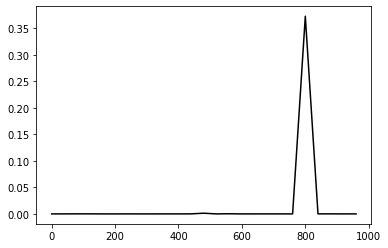

In [8]:
plt.plot(range(0, 1000, 40), std_lat, 'k');

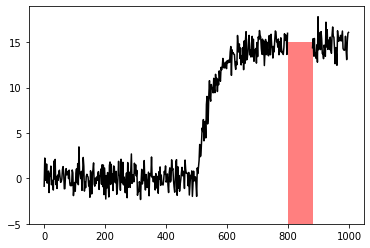

In [9]:
y1=int(800/2)
y2 = y1+40
    
velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)
velo[y1:y2] = np.nan

plt.bar(800, 20, width=80, color='r', bottom=-5, align='edge', alpha=.5)
plt.plot(x, velo, 'k');

In [10]:
N_test = 200

std_lat = []
for y1 in range(0, 500, 20) :
    
    y2 = y1+40
    
    velo = fct_velocity(x, latency, tau, steady_state)
    velo += 1*np.random.randn(x.size)
    
    velo[y1:y2] = np.nan
    
    Lats = []
    for i_test in range(N_test):
        

        for num_par in range(len(param_fit)) :
            
            if param_fit[num_par]['name'] == 'latency' :
                val = param_fit[num_par]['value']+np.random.choice([1, -1])*100*np.random.rand()
            else :
                val = param_fit[num_par]['value']
            
            params.add(param_fit[num_par]['name'],
                       value = val,
                       min   = param_fit[num_par]['min'],
                       max   = param_fit[num_par]['max'])

        result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)
        Lats.append(result_deg.values['latency'])
        
    std_lat.append(np.std(Lats))
    print(f'y[{y1*2}, {y2*2}] = {np.mean(Lats):.2f} +/- {np.std(Lats):.2f} (ms)')

y[0, 80] = 500.18 +/- 0.00 (ms)
y[40, 120] = 499.91 +/- 0.00 (ms)
y[80, 160] = 501.23 +/- 0.00 (ms)
y[120, 200] = 499.68 +/- 0.00 (ms)
y[160, 240] = 499.52 +/- 0.00 (ms)
y[200, 280] = 500.09 +/- 0.00 (ms)
y[240, 320] = 500.24 +/- 0.00 (ms)
y[280, 360] = 500.50 +/- 0.00 (ms)
y[320, 400] = 500.64 +/- 0.00 (ms)
y[360, 440] = 499.72 +/- 0.00 (ms)
y[400, 480] = 498.35 +/- 0.44 (ms)
y[440, 520] = 499.31 +/- 0.00 (ms)
y[480, 560] = 478.68 +/- 0.00 (ms)
y[520, 600] = 509.94 +/- 16.09 (ms)
y[560, 640] = 515.81 +/- 33.55 (ms)
y[600, 680] = 501.16 +/- 0.00 (ms)
y[640, 720] = 500.00 +/- 0.00 (ms)
y[680, 760] = 499.68 +/- 0.00 (ms)
y[720, 800] = 499.20 +/- 0.00 (ms)
y[760, 840] = 500.09 +/- 0.00 (ms)
y[800, 880] = 500.83 +/- 0.00 (ms)
y[840, 920] = 500.33 +/- 0.00 (ms)
y[880, 960] = 499.98 +/- 0.00 (ms)
y[920, 1000] = 501.77 +/- 0.23 (ms)
y[960, 1040] = 500.44 +/- 0.00 (ms)


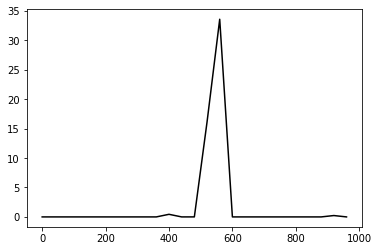

In [11]:
plt.plot(range(0, 1000, 40), std_lat, 'k');

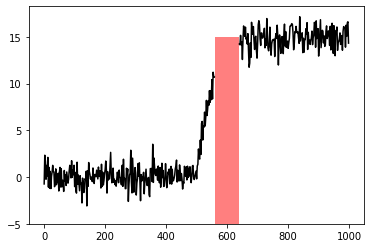

In [12]:
y1=int(560/2)
y2 = y1+40
    
velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)
velo[y1:y2] = np.nan

plt.bar(560, 20, width=80, color='r', bottom=-5, align='edge', alpha=.5)
plt.plot(x, velo, 'k');